# Analyzing IBM HR Analytics Employee Attrition & Performance using Decision Tree and Keras Deep Learning
Predict attrition of your valuable employees

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [111]:
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from sklearn.model_selection import GridSearchCV

0.19.1


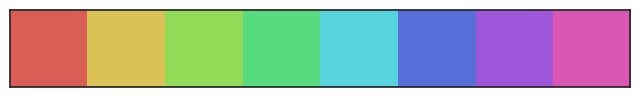

In [112]:
print(sklearn.__version__)
#creating SNS seaborn color palette
sns.palplot(sns.color_palette("hls", 8))
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
IBMData = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
IBMData.head()

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Data cleaning

#Data cleaning
#Are there missing values?

In [114]:
IBMData.isnull().any()

﻿Age                        False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

#Exploring the datatypes of columns in Dataframe

In [115]:
IBMData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
﻿Age                        1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

#Exploring Data Manually to Remove or impute any bad data

In [116]:
IBMData

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Analysis 1 Done
Data is cleaned.

We can see that 237 employees have been retained whereas 1233 employees have been let go of. 


In [117]:
IBMData["Attrition"].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [118]:
AttritionNo = (IBMData["Attrition"] == 'No').sum()

In [119]:
y =IBMData['TotalWorkingYears'].values

In [120]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
IBMData["Attrition_numerical"] = IBMData["Attrition"].apply(lambda x: target_map[x])


In [121]:
type(IBMData)

pandas.core.frame.DataFrame

In [122]:
df= pd.DataFrame(IBMData)

In [123]:
df

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0


1.Data Distribution
2.Summary Statistics
3.Anomalies-Outliers 

In [124]:
df.describe()

,﻿Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


Inter quartile range


In [125]:
df.quantile([.25, .5, .75])

,﻿Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0.25,30.0,465.0,2.0,2.0,1.0,491.25,2.0,48.00,2.0,1.0,...,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0,0.0
0.50,36.0,802.0,7.0,3.0,1.0,1020.50,3.0,66.00,3.0,2.0,...,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0,0.0
0.75,43.0,1157.0,14.0,4.0,1.0,1555.75,4.0,83.75,3.0,3.0,...,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0,0.0


In [126]:
import plotly.graph_objs as go
import string

In [127]:
df.head()

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


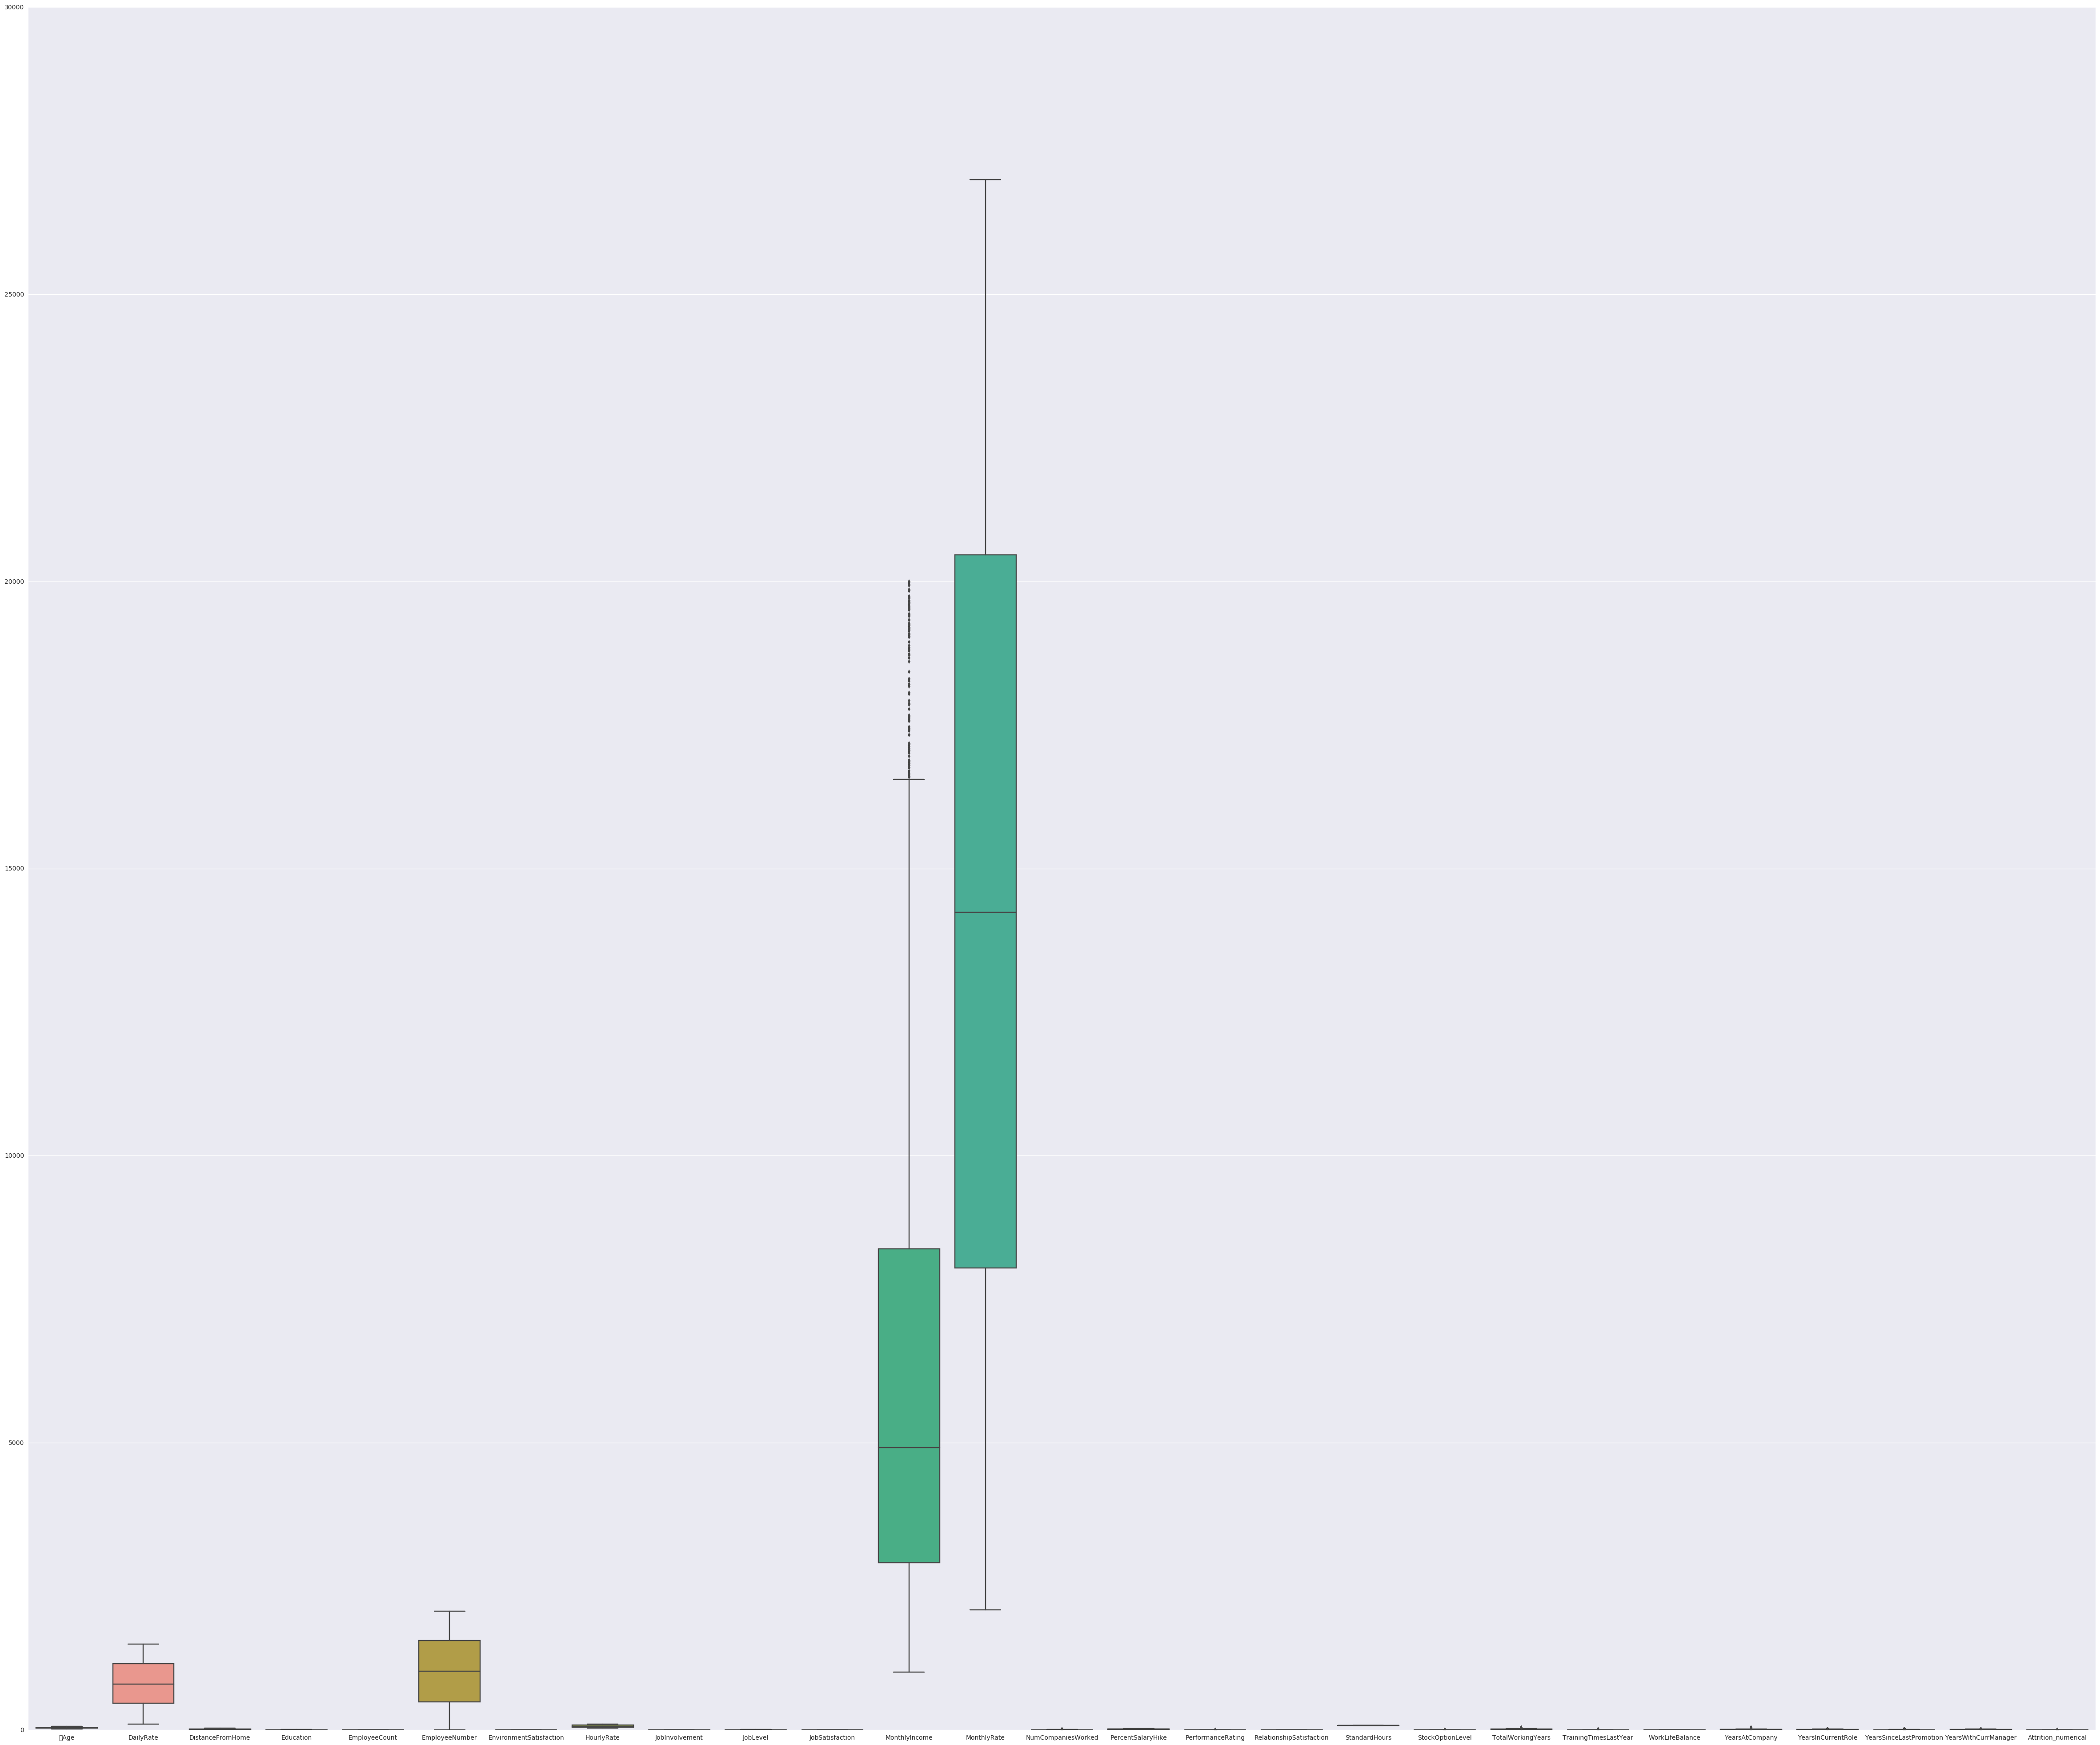

In [128]:
sns.set(rc={'figure.figsize':(60,50)})

sns.boxplot(data=df)   


#Attrition Distribution

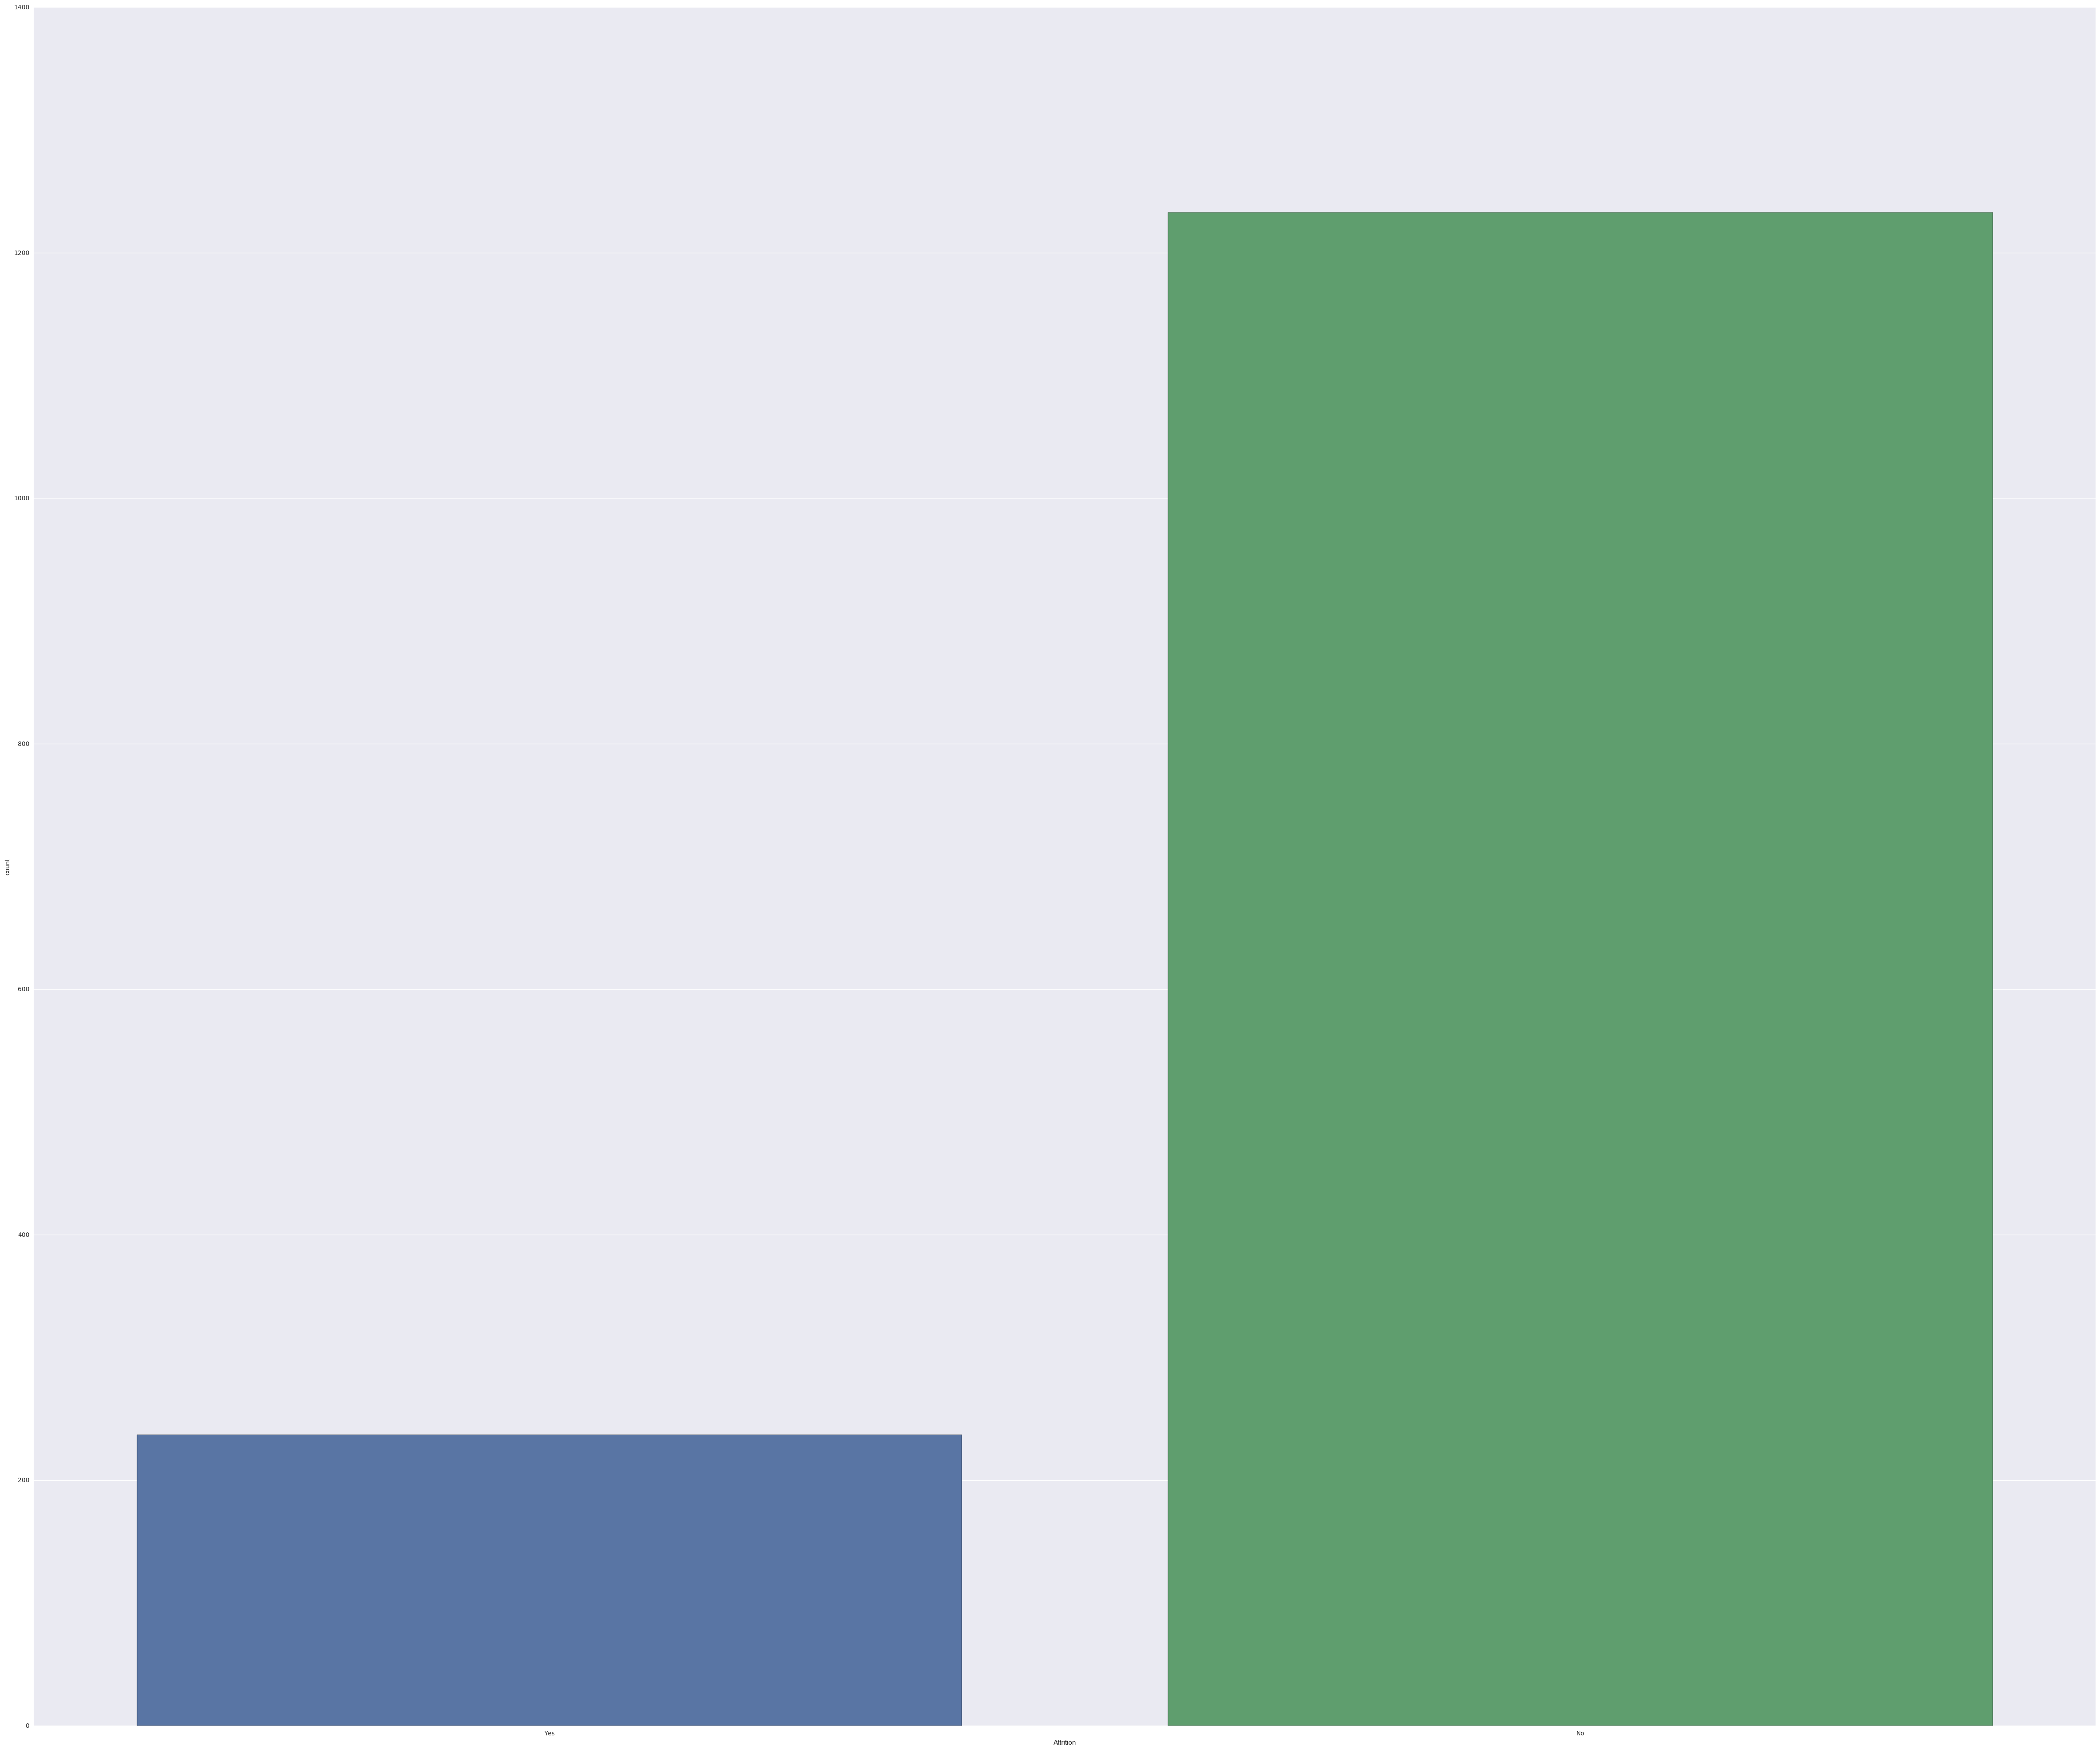

In [129]:
sns.countplot(df['Attrition'])
plt.show()

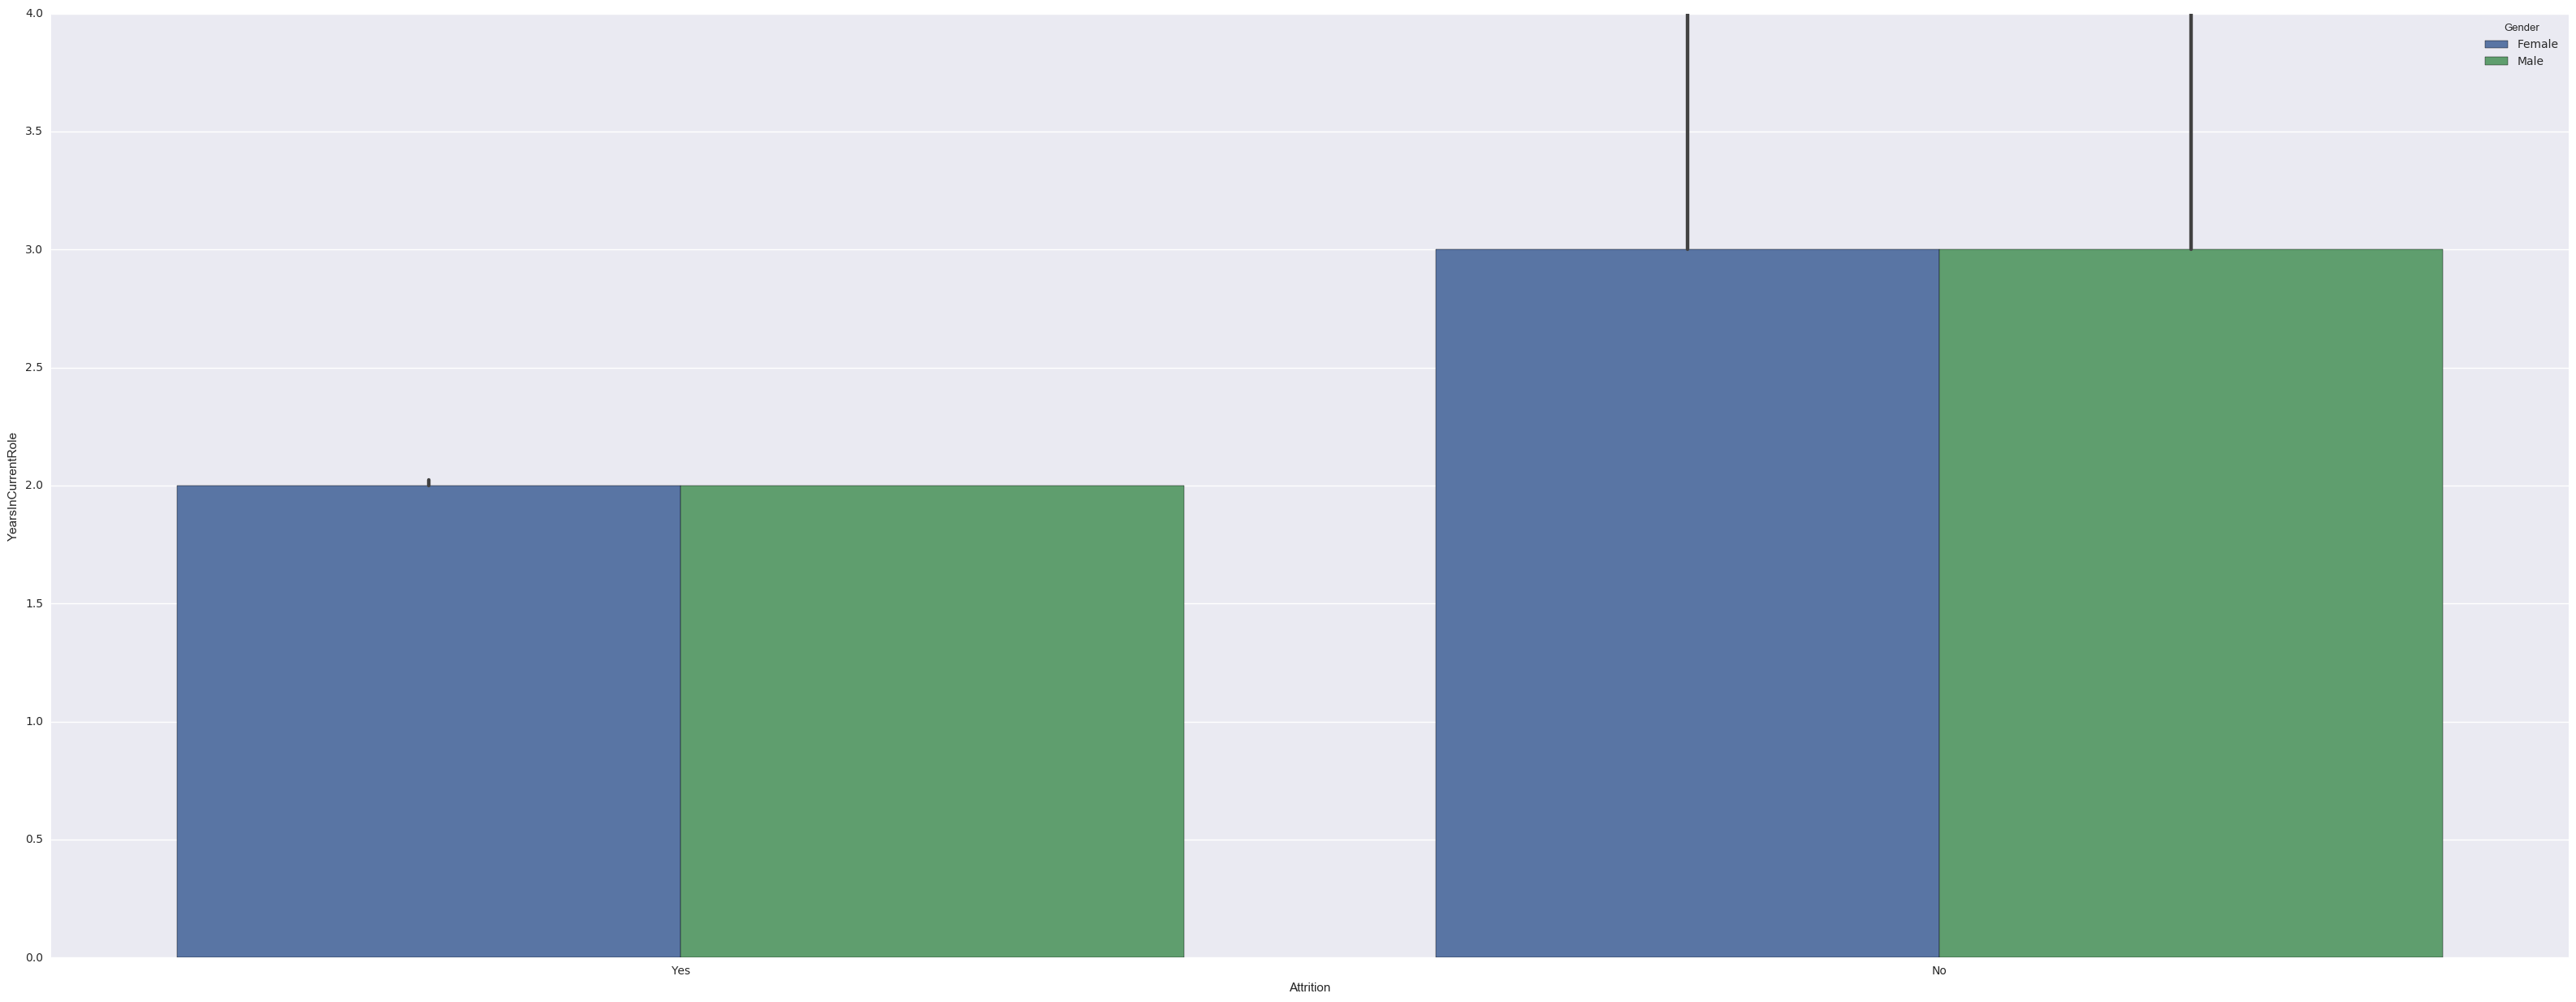

In [130]:
#Bar plot of Attrition with respect to MonthlyRate grouping gender gender
#Estimator used is median
f,ax = plt.subplots(figsize=(40,15))

from numpy import median
sns.barplot(x='Attrition', y='YearsInCurrentRole', hue= 'Gender',data=df, estimator=median)
#plt.show()

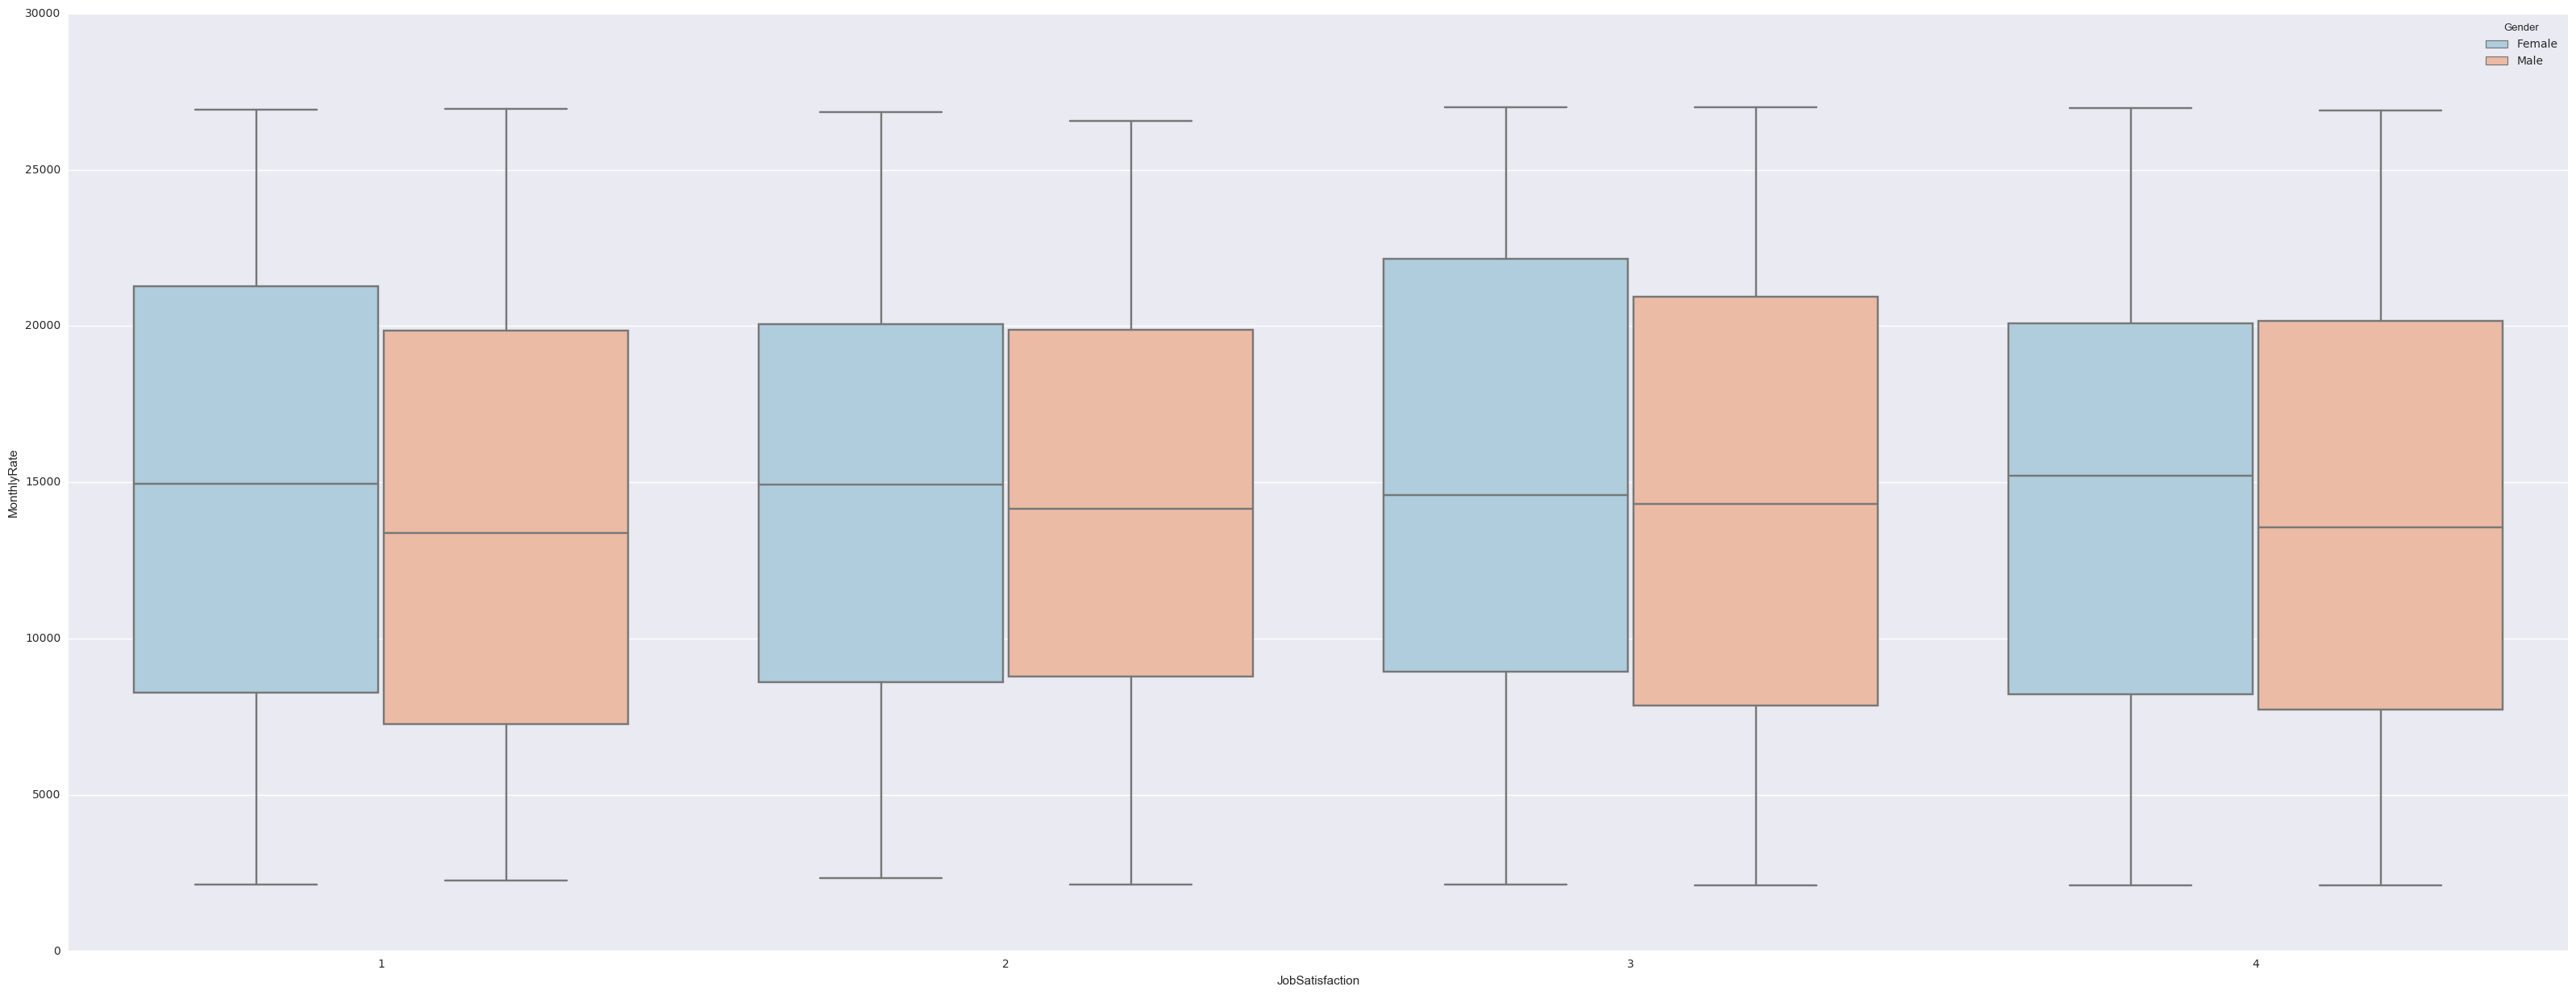

In [131]:
#box plot JobSatisfaction vs MonthlyRate based on gender
f,ax = plt.subplots(figsize=(40,15))
sns.boxplot(x='JobSatisfaction', y='MonthlyRate', data=df, hue='Gender',palette='RdBu_r')
plt.show()

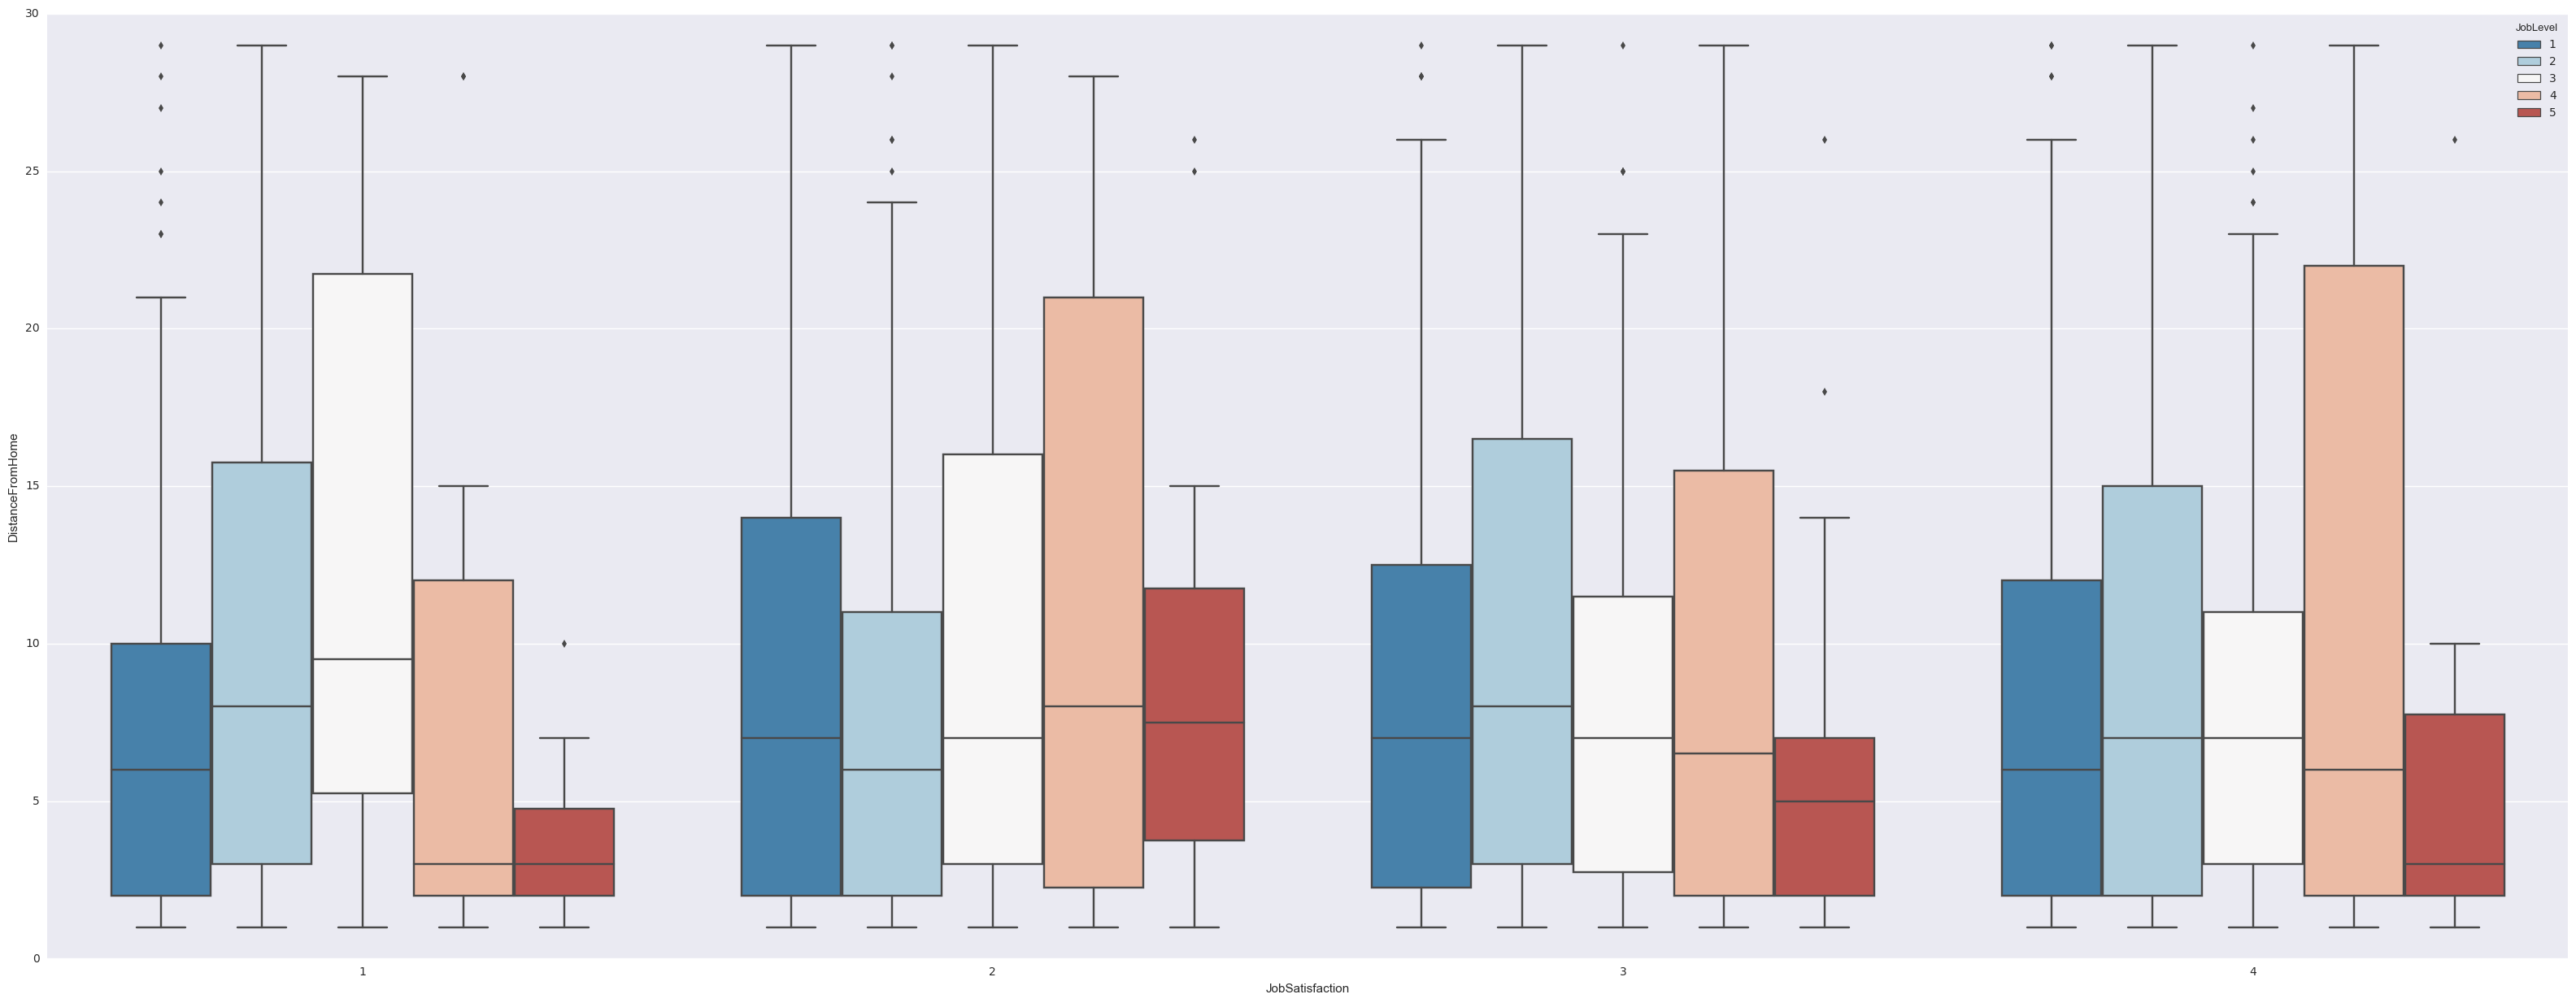

In [132]:
#box plot JobSatisfaction vs MonthlyRate based on gender
f,ax = plt.subplots(figsize=(40,15))
sns.boxplot(x='JobSatisfaction', y='DistanceFromHome', data=df, hue='JobLevel',palette='RdBu_r')
plt.show()

In [133]:
 df.rename(index=str, columns={"\ufeffAge": "Age"})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0


In [134]:
df['\ufeffAge']

0       41
1       49
2       37
3       33
4       27
5       32
6       59
7       30
8       38
9       36
10      35
11      29
12      31
13      34
14      28
15      29
16      32
17      22
18      53
19      38
20      24
21      36
22      34
23      21
24      34
25      53
26      32
27      42
28      44
29      46
        ..
1440    36
1441    56
1442    29
1443    42
1444    56
1445    41
1446    34
1447    36
1448    41
1449    32
1450    35
1451    38
1452    50
1453    36
1454    45
1455    40
1456    35
1457    40
1458    35
1459    29
1460    29
1461    50
1462    39
1463    31
1464    26
1465    36
1466    39
1467    27
1468    49
1469    34
Name: ﻿Age, dtype: int64

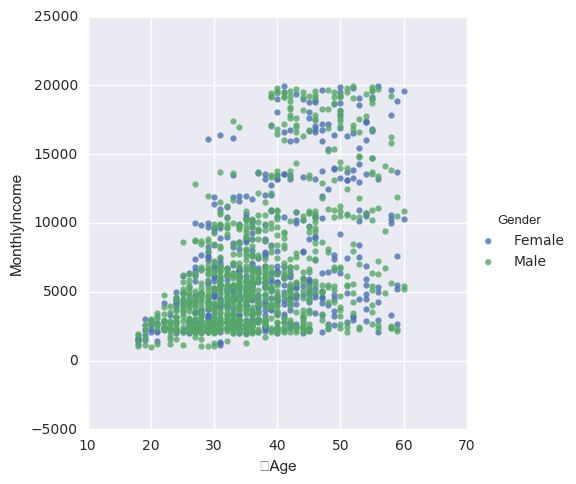

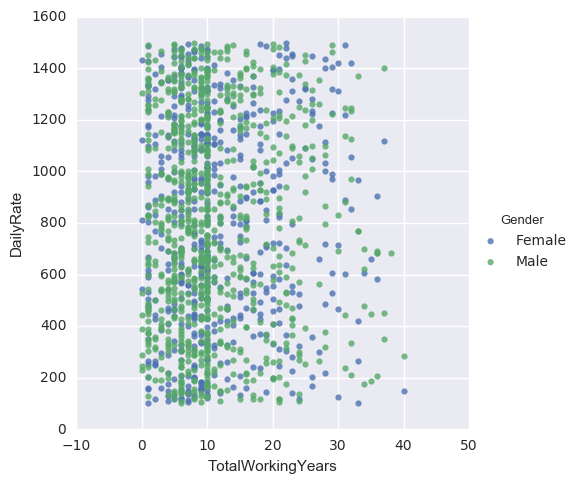

In [135]:
#Scatter Plot OF Age of Employees vs Monthly Income , grouping it by gender

sns.lmplot(x='\ufeffAge', y='MonthlyIncome', hue='Gender', data=df, fit_reg=False)

sns.lmplot(x='TotalWorkingYears', y='DailyRate', hue='Gender', data=df, fit_reg=False)


# Plotting a diagonal correlation matrix


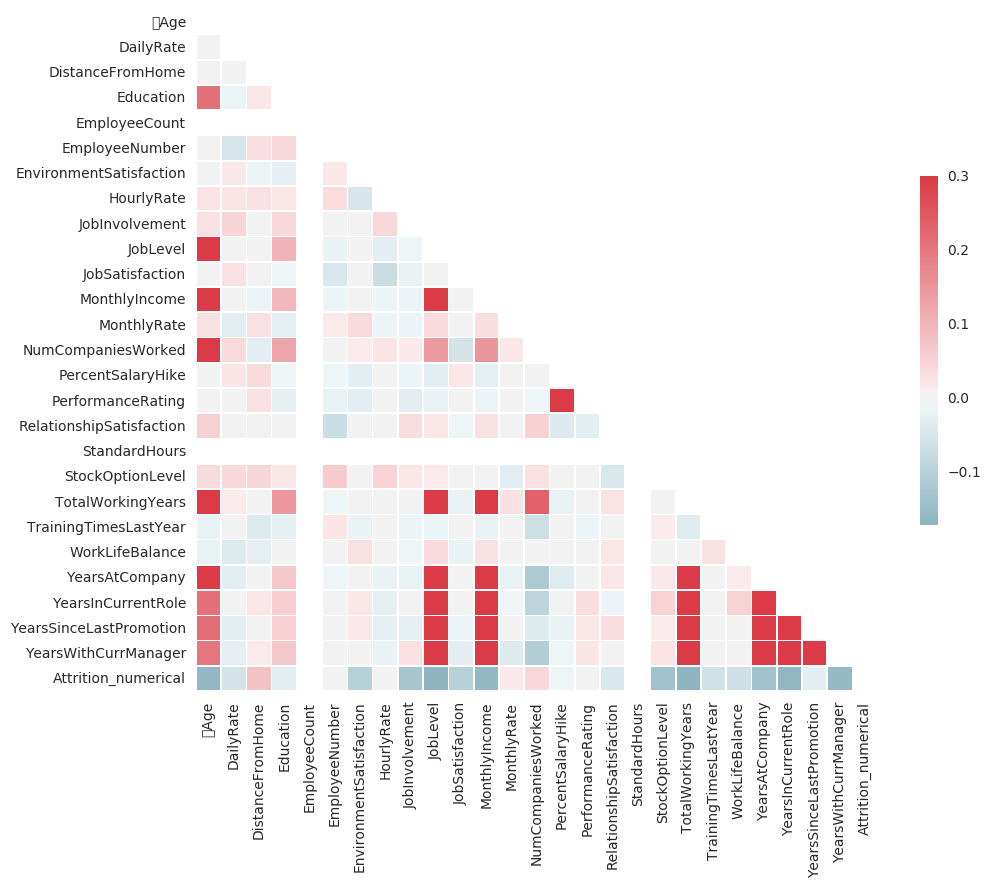

In [136]:
corr = df.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

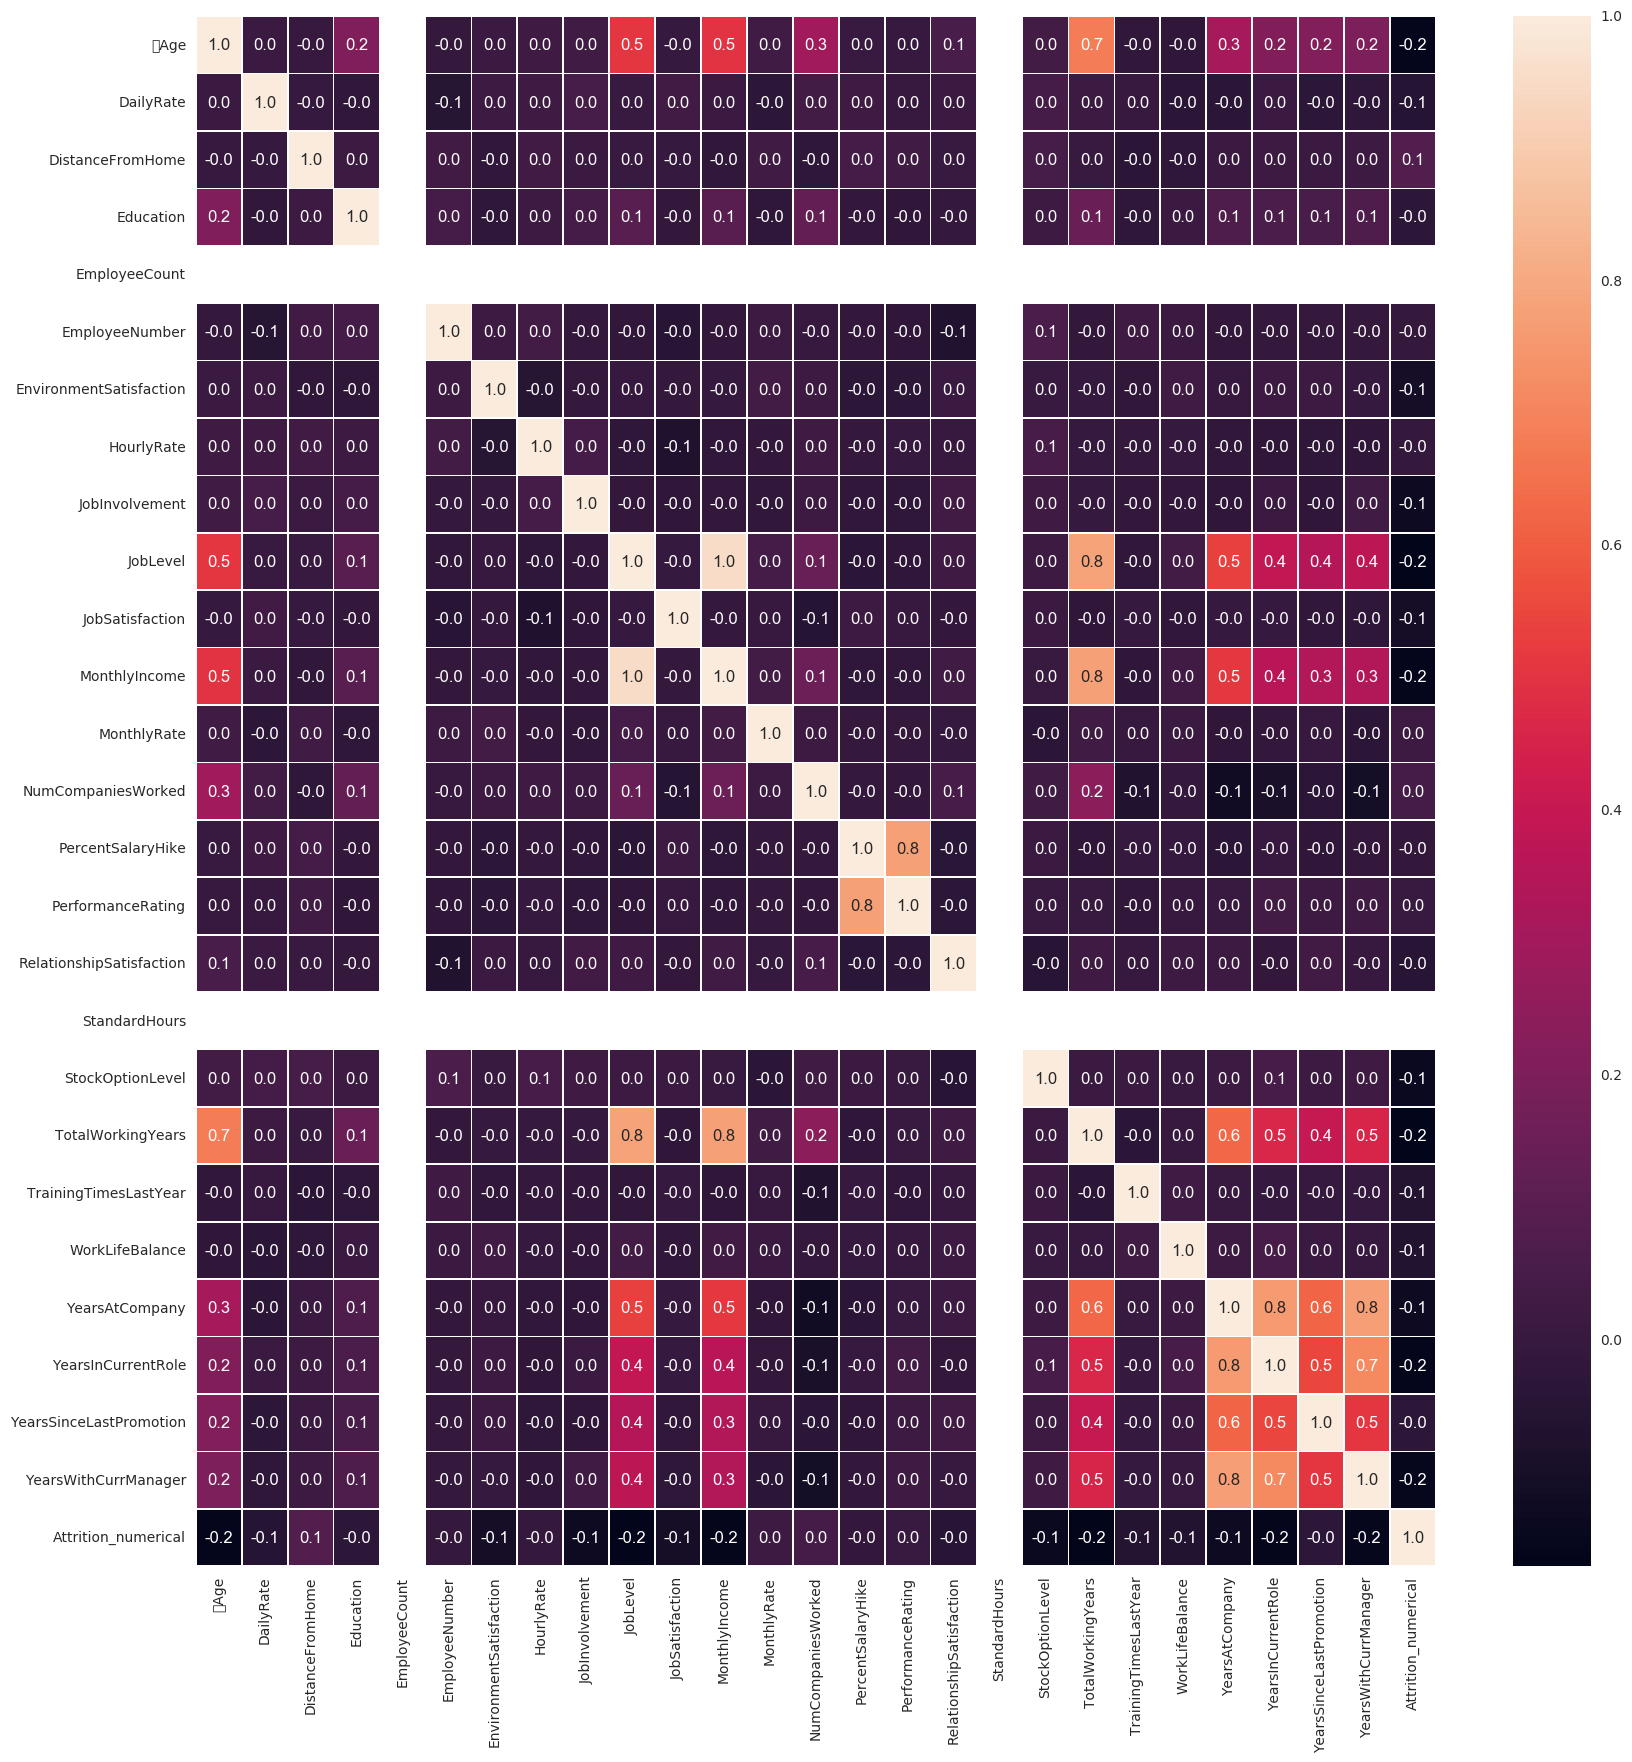

In [137]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [138]:
#View the attrition based on different variables...\ufeffAge

df.MonthlyIncome.mean()
df.MonthlyIncome.std()


4707.956783097995

In [139]:
l=df[np.abs(df.MonthlyIncome-df.MonthlyIncome.mean())<=(3*df.MonthlyIncome.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [140]:
l=df[np.abs(df.YearsAtCompany-df.YearsAtCompany.mean())<=(3*df.YearsAtCompany.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [141]:
l=df[np.abs(df.YearsInCurrentRole-df.YearsInCurrentRole.mean())<=(3*df.YearsInCurrentRole.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
l=df[np.abs(df.YearsSinceLastPromotion-df.YearsSinceLastPromotion.mean())<=(3*df.YearsSinceLastPromotion.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
l=df[np.abs(df.YearsWithCurrManager-df.YearsWithCurrManager.mean())<=(3*df.YearsWithCurrManager.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
l=df[np.abs(df.TotalWorkingYears-df.TotalWorkingYears.mean())<=(3*df.YearsSinceLastPromotion.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [142]:
df=l

In [143]:
# Import the train_test_split method
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit


In [144]:
attritiondata=df

In [145]:
attritiondata.head()

,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [146]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
       u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
       u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
       u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
       u'StockOptionLevel', u'TotalWorkingYears',
       u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager']

# Performing one hot encoding for target_map
target_map = {'Yes':1, 'No':0}
attritiondata["Attrition_numerical"] = attritiondata["Attrition"].apply(lambda x: target_map[x])

# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

# Drop the Attrition_numerical column from attrition dataset first - Don't want to include that
attritiondata = attritiondata.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attritiondata.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# getting numerical data
mydata_num = attritiondata.columns.difference(categorical)

# getting catergoical data
mydata_Cat = attritiondata[categorical]
mydata_Cat = mydata_Cat.drop(['Attrition'], axis=1) # Dropping the target column


In [147]:
numerical

['Age',
 'DailyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'PerformanceRating',
 'WorkLifeBalance',
 'YearsAtCompany',
 'Attrition_numerical']

In [148]:
mydata_Cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [149]:
#Creating dummy variable for categorical variables
mydata_Cat = pd.get_dummies(mydata_Cat)
mydata_Cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [150]:
# Storing the numerical data to mydata_Num
mydata_Num = attritiondata[mydata_num]

mydata_Num.head()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,﻿Age
0,1102,1,2,1,1,2,94,3,2,4,...,80,0,8,0,1,6,4,0,5,41
1,279,8,1,1,2,3,61,2,2,2,...,80,1,10,3,3,10,7,1,7,49
2,1373,2,2,1,4,4,92,2,1,3,...,80,0,7,3,3,0,0,0,0,37
3,1392,3,4,1,5,4,56,3,1,3,...,80,0,8,3,3,8,7,3,0,33
4,591,2,1,1,7,1,40,3,1,2,...,80,1,6,3,3,2,2,2,2,27


In [151]:
# Concat the two dataframes together columnwise
finaldata_attrition = pd.concat([mydata_Cat, mydata_Num], axis=1)
finaldata_attrition.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,﻿Age
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,80,0,8,0,1,6,4,0,5,41
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,1,10,3,3,10,7,1,7,49
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,80,0,7,3,3,0,0,0,0,37
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,0,8,3,3,8,7,3,0,33
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,80,1,6,3,3,2,2,2,2,27


In [152]:
finaldata_attrition.columns.values

array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction',

In [153]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attritiondata["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

# Creating test and train subsets by selecting train size =.75 of original data

In [154]:
# Import the train_test_split method
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(finaldata_attrition, target, train_size= 0.75,random_state=0);
#train, test, target_train, target_val = StratifiedShuffleSplit(attrition_final, target, random_state=0);

train=train.rename(columns = {'\ufeffAge':'Age'})
test=test.rename(columns = {'\ufeffAge':'Age'})

target_train=target_train.rename(columns = {'\ufeffAge':'Age'})
target_train=target_train.rename(columns = {'\ufeffAge':'Age'})


train.head()

test.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
1156,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,2,18,2,3,18,15,14,12,40
1236,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,80,3,16,3,3,2,2,2,2,36
751,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,80,1,19,3,3,18,7,0,13,50
407,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,2,8,3,2,2,2,0,2,45
530,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80,0,9,3,3,9,7,0,7,27


# Removing the oversampling

In [155]:
import sys
sys.path.append("c:\program files\anaconda3\lib\site-packages") # go to parent dir

#Configuring the SMOTE

from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

# Random Forest

In [156]:
seed = 0
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 900,
    'warm_start': True, 
    'max_features': 0.4,
    'max_depth':12,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [157]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=True)

In [158]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [159]:
accuracy_score(target_val, rf_predictions)

0.8600682593856656

In [160]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = finaldata_attrition.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = finaldata_attrition.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [161]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re


In [162]:

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(train, target_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(test)


#predicted output
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [163]:
df=df.rename(columns = {'\ufeffAge':'Age'})

In [164]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_numerical'], dtype=object)

# Creating the data for ANN

In [165]:
from subprocess import check_call
from subprocess import check_output

In [166]:
X = finaldata_attrition.iloc[:, 1:].values
y = finaldata_attrition.iloc[:, 0].values

X

array([[ 0.,  1.,  0., ...,  0.,  5., 41.],
       [ 1.,  0.,  0., ...,  1.,  7., 49.],
       [ 0.,  1.,  0., ...,  0.,  0., 37.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  3., 27.],
       [ 1.,  0.,  0., ...,  0.,  8., 49.],
       [ 0.,  1.,  0., ...,  1.,  2., 34.]])

### Encoding Categorical data
Using Label Encoder and One HotEncoder

In [167]:
myDataset=attritiondata

In [168]:
 myDataset=myDataset.rename(index=str, columns={"\ufeffAge": "Age"})

#Rearrngeing Columns for ANN

In [169]:
myDataset = myDataset[['Attrition',
                   'Age',
                   'BusinessTravel',
                   'DailyRate',
                   'Department',
                   'DistanceFromHome',
                   'Education',
                   'EducationField',
                   'EmployeeCount',
                   'EnvironmentSatisfaction',
                   'Gender',
                   'HourlyRate',
                   'JobInvolvement',
                   'JobLevel',
                   'JobRole',
                   'JobSatisfaction',
                   'MaritalStatus',
                   'MonthlyIncome',
                   'MonthlyRate',
                   'NumCompaniesWorked',
                   'OverTime',
                   'PercentSalaryHike',
                   'PerformanceRating',
                   'RelationshipSatisfaction',
                   'StockOptionLevel',
                   'TotalWorkingYears',
                   'TrainingTimesLastYear',
                   'WorkLifeBalance',
                   'YearsAtCompany',
                   'YearsInCurrentRole',
                   'YearsSinceLastPromotion',
                   'YearsWithCurrManager']]


In [170]:
myDataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [171]:
X = myDataset.iloc[:, 1:].values
y = myDataset.iloc[:, 0].values

In [172]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_6= LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])
labelencoder_X_9= LabelEncoder()
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
labelencoder_X_13= LabelEncoder()
X[:, 13] = labelencoder_X_13.fit_transform(X[:, 13])
labelencoder_X_15= LabelEncoder()
X[:, 15] = labelencoder_X_15.fit_transform(X[:, 15])
labelencoder_X_19= LabelEncoder()
X[:, 19] = labelencoder_X_19.fit_transform(X[:, 19])
X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [173]:
#no dummy trap
onehotencoder1 = OneHotEncoder(categorical_features = [1])
X = onehotencoder1.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder3 = OneHotEncoder(categorical_features = [4])
X = onehotencoder3.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder6 = OneHotEncoder(categorical_features = [8])
X = onehotencoder6.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder13 = OneHotEncoder(categorical_features = [19])
X = onehotencoder13.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder15 = OneHotEncoder(categorical_features = [28])
X = onehotencoder15.fit_transform(X).toarray()
X = X[:,1:]

#Splitting the dataset into the Training set and Test set

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [175]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Implementing Keras Deep Learning Algorithm


Why Keras?
1.Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2.Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3.Runs seamlessly on CPU and GPU.

In [176]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [177]:
dropout = 0.1
epochs = 10
batch_size = 10
optimizer = 'adam'
k = 20

Activators->
1.Relu:  rectifier is an activation function defined as the positive part of its argument x+
2.Sigmoid:used to introduce nonlinearity in the model. 

In [178]:
# Evaluating the Keras ANN using Keras Sequential model
def build_classifier():
    classifier = Sequential()
    
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    
    classifier.add(Dropout(dropout))
    
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    
    return classifier


In [179]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 30)
max = accuracies.max()



In [189]:
print("Best accuracy: ",max)


Best accuracy:  0.965517243434643


# Tweaking an existing machine learning algorithm.

1. Change Dropouts
2. Adjust Layers
3. Modify epoch

In [190]:
dropout = 0.2
epochs = 50
batch_size = 10
optimizer = 'adam'
k = 20

In [191]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential())(())
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 30)
max = accuracies.max()

In [192]:
print("Best accuracy: ",max)

Best accuracy:  1.0


In [204]:
dropout = 0.5
epochs = 10
batch_size = 10
optimizer = 'adam'
k = 20

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 30)
max = accuracies.max()

In [201]:
print("Best accuracy: ",max)


Best accuracy:  0.9333333373069763
